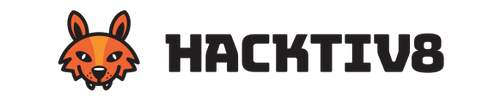

Title : Social Network Ads Purchase Prediction // Final Project by Raf'ie Yusuf // Intro to Python for Data Science by Hacktiv8 Batch 057

# INTRODUCTION

The Social Network dataset created by Ananya Nayan as can be seen on kaggle.com (https://www.kaggle.com/dragonheir/logistic-regression?select=Social_Network_Ads.csv). This dataset is made of one CSV file and it contains 400 rows & 5 columns. The Objective of this project is to predict someone wether he or she will buy the social ads by predicting from their estimated salary. The dataset contains several parameters which are considered important during the application for the purchase.

The parameters included are :

1. User ID ( Random )
2. Gender ( Male or Female )
3. Age
4. Estimated Salary
5. Purchased ( '0' no and '1' yes )

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.linear_model as linear_model
import sklearn.neighbors as neighbors
import math
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

# LOADING DATASET & EXPLORATORY DATA ANALYSYS

In [2]:
# Loading Dataset
df = pd.read_csv('/Users/Fie/Desktop/dataset/Social_Network_Ads.csv')

#Printing info for dataset loaded properly into a pandas dataframe
print('Social Network Ads dataset read into a pandas dataframe')

Social Network Ads dataset read into a pandas dataframe


In [3]:
#head() function to know the top 5 rows of the dataset
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#tail() function to know the bottom 5 rows of the dataset
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
#Gathering info before we start analyzing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
#Getting info of the columns
df.columns.values

array(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'],
      dtype=object)

In [7]:
#better to look for the missing value
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
#dropping the columns we don't need
dfc = df.drop(['User ID'], axis=1)
dfc

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


# DATA VISUALIZING

<AxesSubplot:>

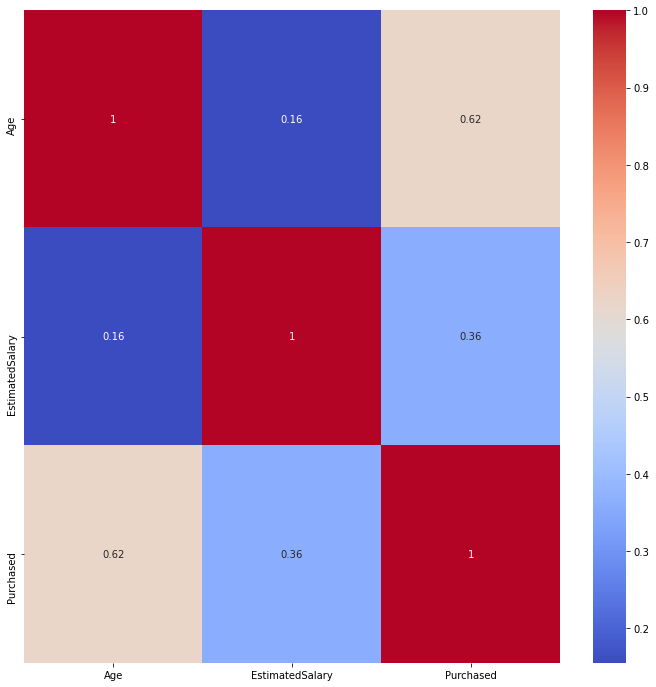

In [9]:
#Correlation plot to see the variables correlation
plt.figure(figsize=(12,12))
sns.heatmap(dfc.corr(), cmap='coolwarm', annot= True)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

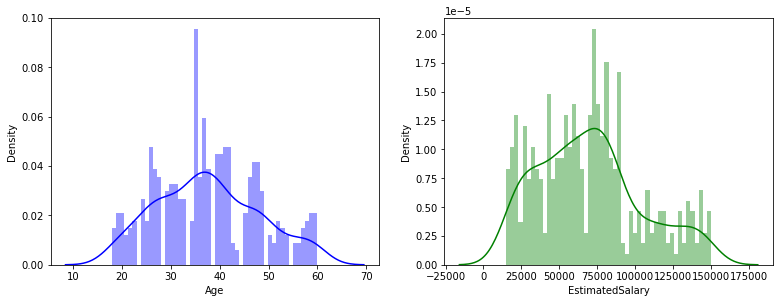

In [10]:
#Visualizing the dataset to see the distribution of each variable
f = plt.figure(figsize=(20,10))


#Plotting the distribution of 'Age'
ax = f.add_subplot(231)
sns.distplot(dfc['Age'],bins=50,color='b',ax=ax)

#Plotting the distribution of 'Estimated Salary'
ax = f.add_subplot(232)
sns.distplot(dfc['EstimatedSalary'],bins=50,color='g',ax=ax)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>

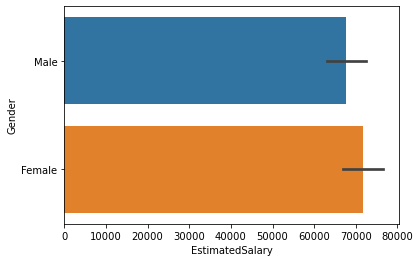

In [11]:
sns.barplot('EstimatedSalary','Gender',data=dfc)

<AxesSubplot:xlabel='Age', ylabel='Gender'>

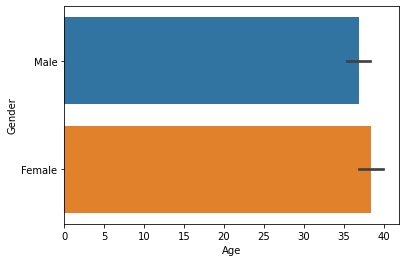

In [12]:
sns.barplot('Age','Gender',data=dfc)

<b> Insight </b>

1. The distribution of Age is densely populated from 30 to 40
2. The distribution of Estimated Salary is densely populated between around 20.000 to 80.000
3. Female has more salary than Male because most of female are older

# DATA PREPROCESSING

Because the 'Gender' feature data type is still an object, we have to encode it to integer or float (to numeric).

In [13]:
#Assigning the variable of the feature
gend = dfc['Gender']

#Encoding the feature into 'male = 1, female = 0'
le = preprocessing.LabelEncoder()
gen_enc = le.fit_transform(gend)

In [14]:
#Replacing the feature with the encoded one
dfc['Gender']=gen_enc
#showing the new dataframe
dfc.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [15]:
#make sure the datatype of the 'Gender' feature is numeric
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


Now, all the data types are numeric. We can continue to process the data before making a model

In [16]:
X = dfc.drop('Purchased', axis=1)
y = dfc['Purchased']

In [17]:
#Normalisation works slightly better for Regression.
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.30,random_state=101)

In [18]:
#Checking the dimension of the training and test data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(280, 3) (280,)
(120, 3) (120,)


# DATA MODELING

<b>Logistic Regression</b>

In [19]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train)

#model predict
logreg_pred = logreg_model.predict(X_test)

#model Evaluation
accuracy_logreg = accuracy_score(y_test, logreg_pred)
mse_logreg = mean_squared_error(y_test, logreg_pred)
rmse_logreg = math.sqrt(mse_logreg)
print("Model's accuracy: ", accuracy_logreg, '\n')
print("Mean Squared Error: ", mse_logreg, '\n')
print("Root Mean Squared Error: ", rmse_logreg,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, logreg_pred),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, logreg_pred))

Model's accuracy:  0.6666666666666666 

Mean Squared Error:  0.3333333333333333 

Root Mean Squared Error:  0.5773502691896257 

Confusion Matrix: 
 [[80  0]
 [40  0]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        80
           1       0.00      0.00      0.00        40

    accuracy                           0.67       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.44      0.67      0.53       120



<b> Inference : </b> The Accuracy score is 66%

<b> K-Neighbors-Classifier </b>

Model's accuracy:  0.8 

Mean Squared Error:  0.2 

Root Mean Squared Error:  0.4472135954999579 

Confusion Matrix: 
 [[65 15]
 [ 9 31]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.67      0.78      0.72        40

    accuracy                           0.80       120
   macro avg       0.78      0.79      0.78       120
weighted avg       0.81      0.80      0.80       120



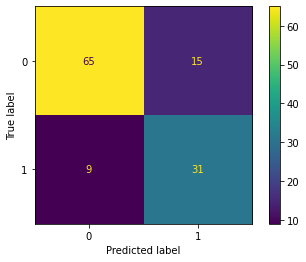

In [20]:
#model fitting
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

#model predict
knn_pred = knn_model.predict(X_test)

#model Evaluation
accuracy_knn = accuracy_score(y_test, knn_pred)
mse_knn = mean_squared_error(y_test, knn_pred)
rmse_knn = math.sqrt(mse_knn)
print("Model's accuracy: ", accuracy_knn, '\n')
print("Mean Squared Error: ", mse_knn, '\n')
print("Root Mean Squared Error: ", rmse_knn,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, knn_pred),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, knn_pred))

#visualizing the KNN model
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model, X_test, y_test)

<b> Inference : </b> The Accuracy score is 80%

<b> Support Vector Machine </b>

In [21]:
#variable assignment
svm_model = svm.SVC()

#model fitting
svm_model.fit(X_train, y_train)

#model prediction
svm_pred = svm_model.predict(X_test)

#model Evaluation
accuracy_svm = accuracy_score(y_test, svm_pred)
print("Accuracy:", accuracy_svm)
mse_svm = mean_squared_error(y_test, svm_pred)
rmse_svm = math.sqrt(mse_knn)
print("Model's accuracy: ", accuracy_svm, '\n')
print("Mean Squared Error: ", mse_svm, '\n')
print("Root Mean Squared Error: ", rmse_svm,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, svm_pred),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, svm_pred))

Accuracy: 0.7833333333333333
Model's accuracy:  0.7833333333333333 

Mean Squared Error:  0.21666666666666667 

Root Mean Squared Error:  0.4472135954999579 

Confusion Matrix: 
 [[76  4]
 [22 18]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.95      0.85        80
           1       0.82      0.45      0.58        40

    accuracy                           0.78       120
   macro avg       0.80      0.70      0.72       120
weighted avg       0.79      0.78      0.76       120



<b> Inference : </b> The Accuracy score is 78,3%

<b> Random Forest </b>

In [22]:
#variable assignment
rf_model = RandomForestClassifier(n_estimators=100)

#Fitting the classifier
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# model Evaluation
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy_rf)
mse_rf = mean_squared_error(y_test, rf_pred)
rmse_rf = math.sqrt(mse_rf)
print("Model's accuracy: ", accuracy_rf, '\n')
print("Mean Squared Error: ", mse_rf, '\n')
print("Root Mean Squared Error: ", rmse_rf,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, rf_pred),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, rf_pred))

Accuracy: 0.9166666666666666
Model's accuracy:  0.9166666666666666 

Mean Squared Error:  0.08333333333333333 

Root Mean Squared Error:  0.28867513459481287 

Confusion Matrix: 
 [[71  9]
 [ 1 39]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.89      0.93        80
           1       0.81      0.97      0.89        40

    accuracy                           0.92       120
   macro avg       0.90      0.93      0.91       120
weighted avg       0.93      0.92      0.92       120



<b> Inference : </b> The Accuracy score is 91,6%

<b> Decision Tree </b>

In [23]:
#variable assignment
dc_model = DecisionTreeClassifier()

#model fitting
dc_model.fit(X_train, y_train)

#model predict for test dataset
dc_pred = dc_model.predict(X_test)

#model evaluation
accuracy_dc = accuracy_score(y_test, dc_pred)
print("Accuracy:", accuracy_dc)
mse_dc = mean_squared_error(y_test, dc_pred)
rmse_dc = math.sqrt(mse_rf)
print("Model's accuracy: ", accuracy_dc, '\n')
print("Mean Squared Error: ", mse_dc, '\n')
print("Root Mean Squared Error: ", rmse_dc,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, dc_pred),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, dc_pred))

Accuracy: 0.8833333333333333
Model's accuracy:  0.8833333333333333 

Mean Squared Error:  0.11666666666666667 

Root Mean Squared Error:  0.28867513459481287 

Confusion Matrix: 
 [[69 11]
 [ 3 37]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.86      0.91        80
           1       0.77      0.93      0.84        40

    accuracy                           0.88       120
   macro avg       0.86      0.89      0.87       120
weighted avg       0.90      0.88      0.89       120



<b> Inference : </b> The Accuracy score is 89,1%

<b> Naive Bayes </b>

In [24]:
#variable assignment
nb_model = GaussianNB()

#model fitting
nb_model.fit(X_train,y_train)

#model predict
nb_pred = nb_model.predict(X_test)

#model evaluation
accuracy_nb = accuracy_score(y_test, nb_pred)
print("Accuracy:", accuracy_nb)
mse_nb = mean_squared_error(y_test, nb_pred)
rmse_nb = math.sqrt(mse_nb)
print("Model's accuracy: ", accuracy_nb, '\n')
print("Mean Squared Error: ", mse_nb, '\n')
print("Root Mean Squared Error: ", rmse_nb,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, nb_pred),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, nb_pred))

Accuracy: 0.9166666666666666
Model's accuracy:  0.9166666666666666 

Mean Squared Error:  0.08333333333333333 

Root Mean Squared Error:  0.28867513459481287 

Confusion Matrix: 
 [[74  6]
 [ 4 36]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        80
           1       0.86      0.90      0.88        40

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



<b> Inference : </b> The Accuracy score is 91,6%

# DATA REPORT

In [25]:
print('Accuracy of Logistic Regression: ', accuracy_logreg)
print('Accuracy of K-Nearest Neighbors: ', accuracy_knn)
print('Accuracy of Random Forest: ', accuracy_rf)
print('Accuracy of Support Vector Machine: ', accuracy_svm)
print('Accuracy of Decision Tree: ', accuracy_dc)
print('Accuracy of Naive Bayes: ', accuracy_nb)

Accuracy of Logistic Regression:  0.6666666666666666
Accuracy of K-Nearest Neighbors:  0.8
Accuracy of Random Forest:  0.9166666666666666
Accuracy of Support Vector Machine:  0.7833333333333333
Accuracy of Decision Tree:  0.8833333333333333
Accuracy of Naive Bayes:  0.9166666666666666


for predicting the purchased social network ads after trying some classifier, i will go with either Random Forest or Naive Bayes since those two have the highest accuracy.